In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv(r"C:\Users\osame\OneDrive\Desktop\elevvo\task2\Mall_Customers.csv")

In [ ]:
EDA

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.shape

(200, 5)

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Dropping CustomerID Column as it isnt informative

In [11]:
df.drop(columns=['CustomerID'],axis=1,inplace=True)

In [12]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


Data Visualization

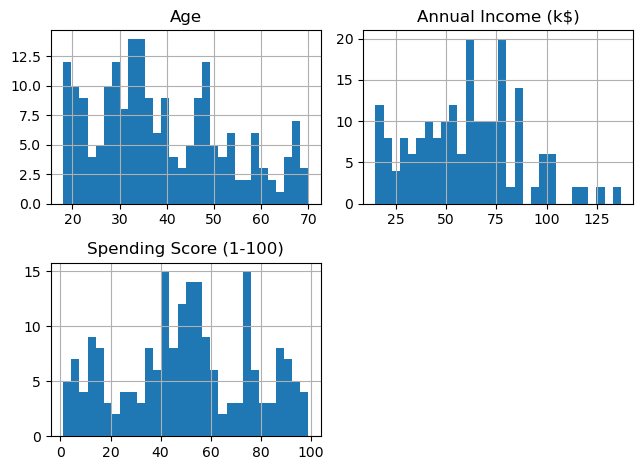

In [16]:
df.hist(bins = 30)
plt.tight_layout()
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

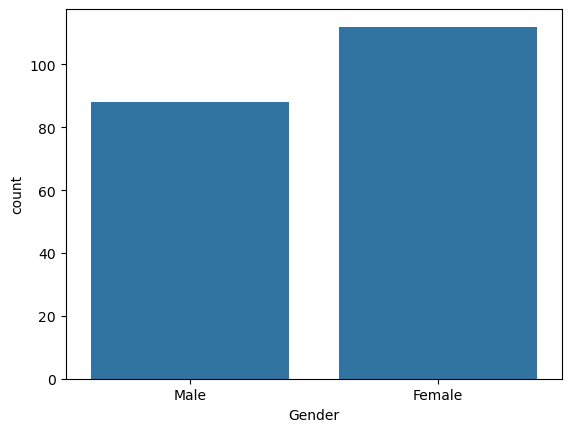

In [17]:
sns.countplot(x=df['Gender'],data =df)

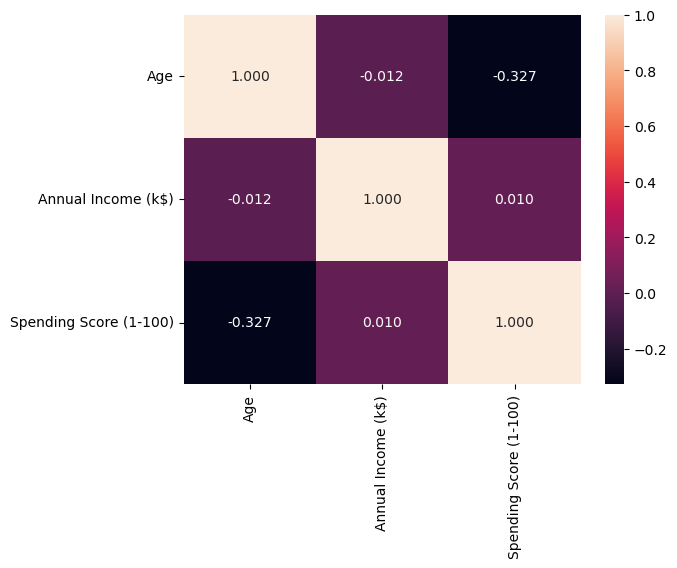

In [18]:
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation,cbar=True,fmt='.3f',annot=True)
plt.show()

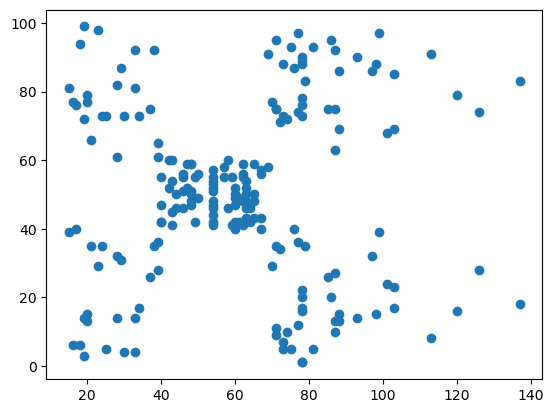

In [20]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.show()

Cluster customers into segments based on income and spending score as requested in task2 description 

In [23]:
df.drop(columns=['Gender','Age'],axis=1,inplace=True)

In [24]:
scaler= MinMaxScaler()

In [25]:
df[['Annual Income (k$)','Spending Score (1-100)']] = scaler.fit_transform(df[['Annual Income (k$)','Spending Score (1-100)']] )

In [26]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


choosing optimal k using elbow method and silhouette method

In [28]:
scores = []
k_range = range(1,10)
for k in k_range:
    model = KMeans(n_clusters = k)
    model.fit(df)
    scores.append(model.inertia_)

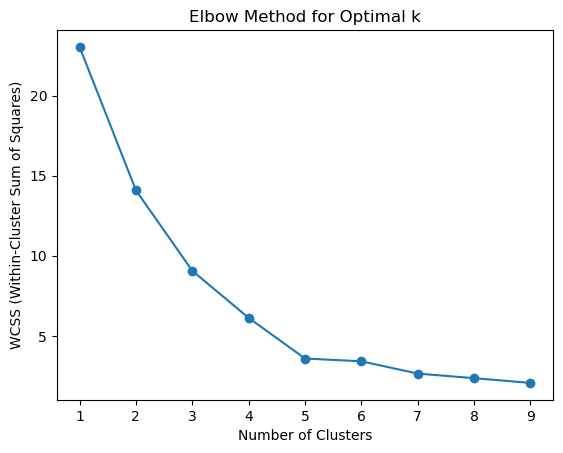

In [29]:
plt.plot(k_range, scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')  
plt.title('Elbow Method for Optimal k')
plt.show()

In [30]:
sil_scores = []
k_range = range(2,10)
for k in k_range:
    model = KMeans(n_clusters = k)
    model.fit(df)
    y_pred = model.predict(df)
    sil_scores.append(silhouette_score(df, y_pred))
    print(f'k = {k}, |  silhouette score = {silhouette_score(df, y_pred)}')

k = 2, |  silhouette score = 0.33340205479521
k = 3, |  silhouette score = 0.4514909309424474
k = 4, |  silhouette score = 0.4971506623868143
k = 5, |  silhouette score = 0.5594854531227246
k = 6, |  silhouette score = 0.5377658512956012
k = 7, |  silhouette score = 0.5203439537395673
k = 8, |  silhouette score = 0.4966932962852793
k = 9, |  silhouette score = 0.4424945975820888


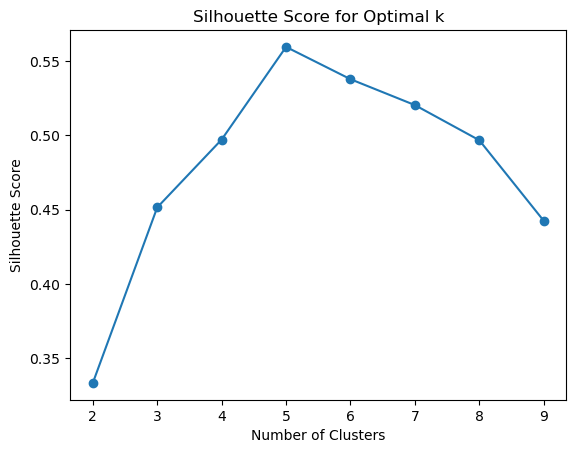

In [31]:
plt.plot(k_range, sil_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

optimal k is equal 5

In [33]:
model = KMeans(n_clusters = 5)
model.fit(df)
labels = model.predict(df)

In [35]:
labels

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 4, 0, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [34]:
df['cluster'] = labels
df.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,0.000000,0.387755,3
1,0.000000,0.816327,1
2,0.008197,0.051020,3
3,0.008197,0.775510,1
4,0.016393,0.397959,3


In [40]:

cluster_counts = df['cluster'].value_counts().sort_index()
cluster_percentages = df['cluster'].value_counts(normalize=True).sort_index() * 100

print("Counts per cluster:\n", cluster_counts)
print("\nPercentages per cluster:\n", cluster_percentages)



Counts per cluster:
 cluster
0    80
1    22
2    36
3    23
4    39
Name: count, dtype: int64

Percentages per cluster:
 cluster
0    40.0
1    11.0
2    18.0
3    11.5
4    19.5
Name: proportion, dtype: float64


In [36]:
model.cluster_centers_

array([[0.32858607, 0.49706633],
       [0.08792846, 0.79962894],
       [0.59631148, 0.16921769],
       [0.09265859, 0.20319432],
       [0.58638083, 0.82783883]])

In [37]:
df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]
df2 = df[df['cluster'] == 2]
df3 = df[df['cluster'] == 3]
df4 = df[df['cluster'] == 4]

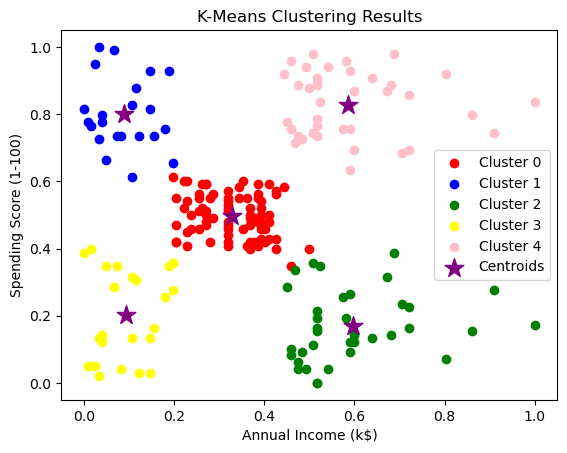

In [38]:
plt.scatter(df0['Annual Income (k$)'], df0['Spending Score (1-100)'], color='red', label='Cluster 0')
plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color='blue', label='Cluster 1') 
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color='green', label='Cluster 2')
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color='yellow', label='Cluster 3')
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], color='pink', label='Cluster 4')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color='purple', marker='*', s=200, label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

overall average spending score across all customers

In [42]:
df['Spending Score (1-100)'].mean()

0.5020408163265305

average spending score per customer segment (cluster)

In [41]:
df.groupby('cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Annual Income (k$),Spending Score (1-100)
cluster,,
0,0.328586,0.497066
1,0.087928,0.799629
2,0.596311,0.169218
3,0.092659,0.203194
4,0.586381,0.827839


final interpretation of data shows that cluster 4 had highest annual income and highest spending score while cluster 1 had the lowest annual income ,but second highest in spending score

trying dbscan

In [43]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959
...,...,...
195,0.860656,0.795918
196,0.909836,0.275510
197,0.909836,0.744898
198,1.000000,0.173469


In [63]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=10)  
dbscan.fit(X)
df['dbscan_cluster'] = dbscan.labels_


In [64]:
df['dbscan_cluster'] 

0     -1
1      0
2     -1
3      0
4     -1
      ..
195   -1
196   -1
197   -1
198   -1
199   -1
Name: dbscan_cluster, Length: 200, dtype: int64

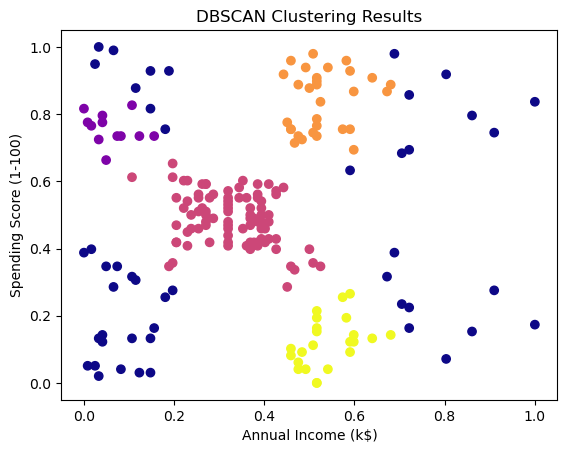

In [65]:
plt.scatter(df['Annual Income (k$)'], 
            df['Spending Score (1-100)'], 
            c=df['dbscan_cluster'], cmap='plasma')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering Results')
plt.show()
